In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/HackXis/Boston Housing Project/housing.data',delim_whitespace=True,header = None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

In [5]:
#    1. CRIM      per capita crime rate by town
#    2. ZN        proportion of residential land zoned for lots over 
#                 25,000 sq.ft.
#    3. INDUS     proportion of non-retail business acres per town
#    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
#                 river; 0 otherwise)
#    5. NOX       nitric oxides concentration (parts per 10 million)
#    6. RM        average number of rooms per dwelling
#    7. AGE       proportion of owner-occupied units built prior to 1940
#    8. DIS       weighted distances to five Boston employment centres
#    9. RAD       index of accessibility to radial highways
#    10. TAX      full-value property-tax rate per $10,000
#    11. PTRATIO  pupil-teacher ratio by town
#    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
#                by town
#    13. LSTAT    % lower status of the population
#    14. MEDV     Median value of owner-occupied homes in $1000's


In [6]:
col_name=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [7]:
df.columns=col_name

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


EDA(Exploratory Data Analysis)

In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


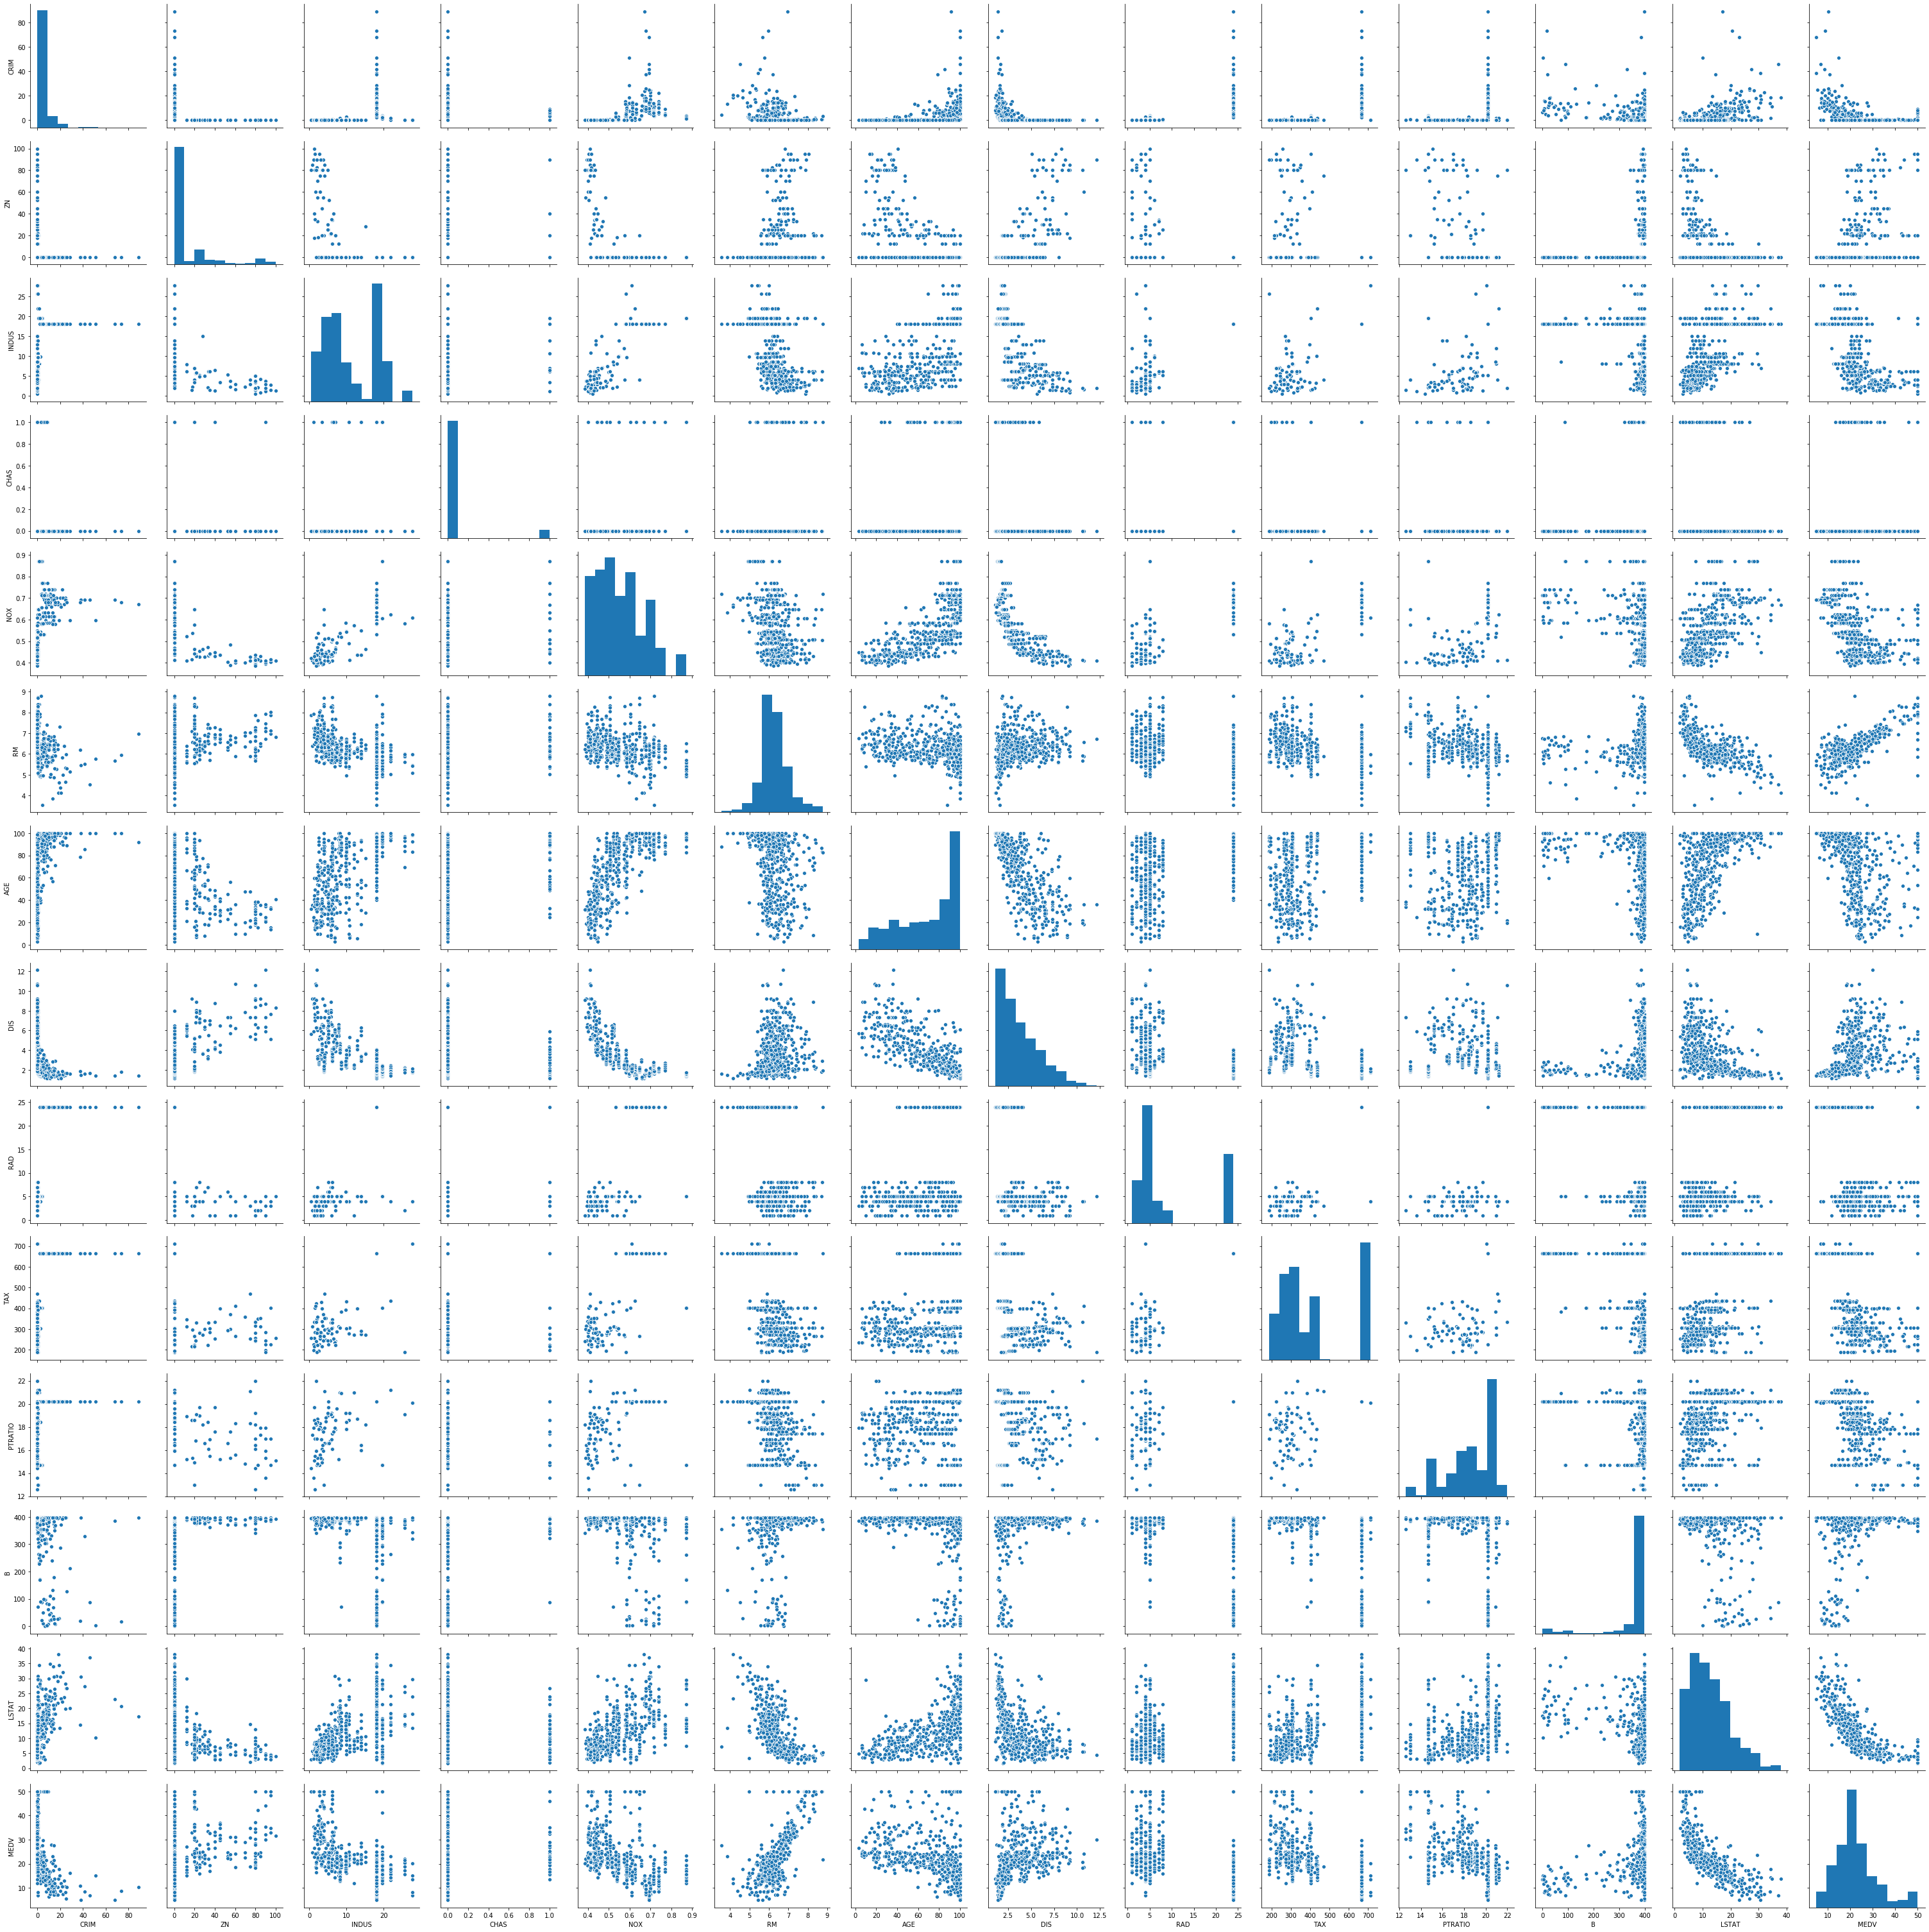

In [10]:
sns.pairplot(df,height=3)

Correlation and Feature Finding

In [11]:
pd.options.display.float_format='{:,.3f}'.format

In [12]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


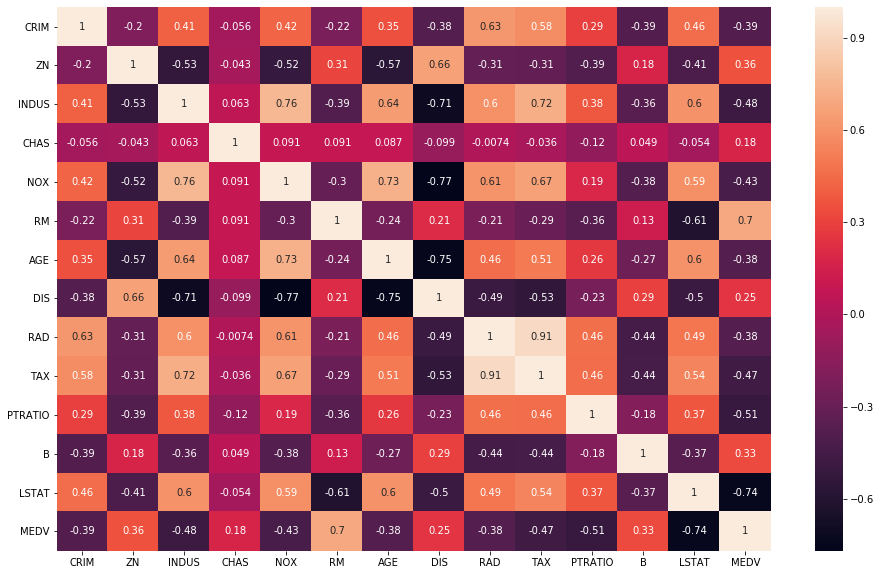

In [13]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [14]:
col_name1=['CRIM','ZN','INDUS','CHAS','MEDV']

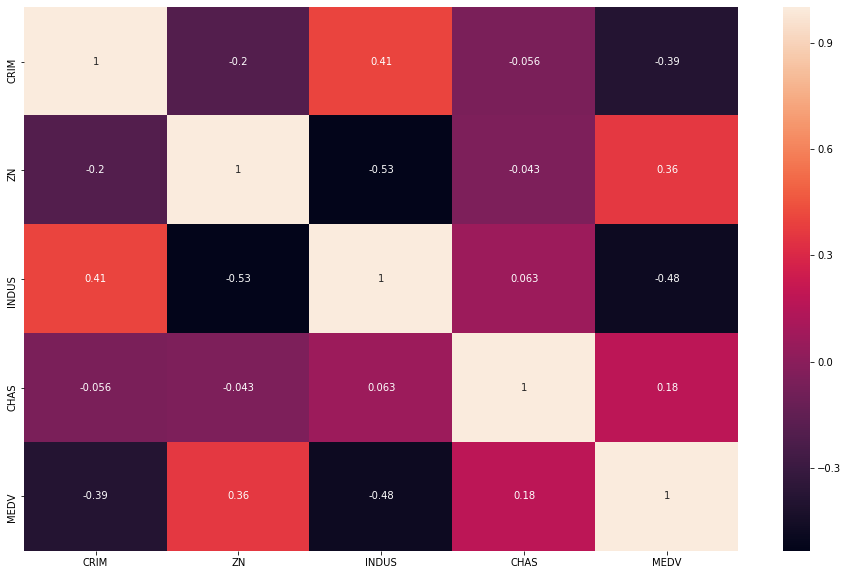

In [15]:
plt.figure(figsize=(16,10))
sns.heatmap(df[col_name1].corr(),annot=True)

#Linear Regression for RM attribute

In [16]:
X=(df['RM']).values.reshape(-1,1)
Y=df['MEDV'].values

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

In [18]:
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
model.coef_

array([9.10210898])

In [20]:
model.intercept_

-34.67062077643857

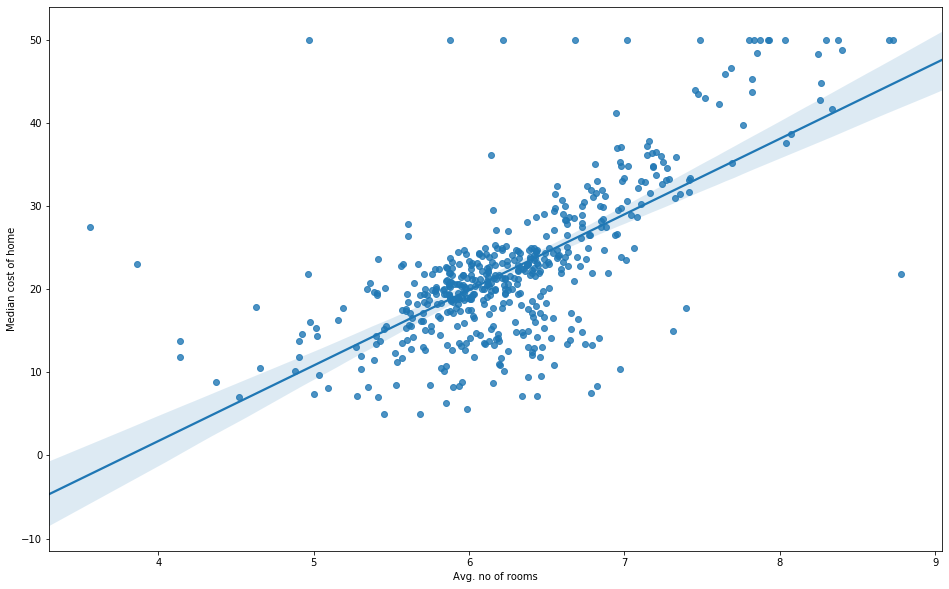

In [21]:
plt.figure(figsize=(16,10))
sns.regplot(X,Y)
plt.xlabel("Avg. no of rooms")
plt.ylabel("Median cost of home")
plt.show()

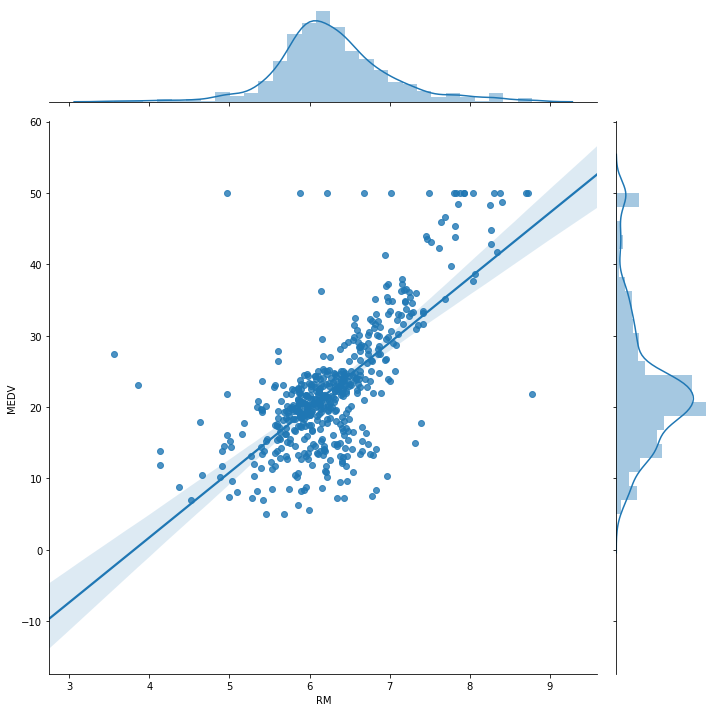

In [22]:
sns.jointplot(x="RM",y="MEDV",data=df,kind='reg',height=10)
plt.show()

Linear Regression on LSTAT attribute

In [23]:
A = df['LSTAT'].values.reshape(-1,1)
B = df['MEDV'].values
model1 = LinearRegression(fit_intercept = True)
model1.fit(A,B)
model1.coef_


array([-0.95004935])

In [24]:
model1.intercept_

34.55384087938311

<Figure size 1152x720 with 0 Axes>

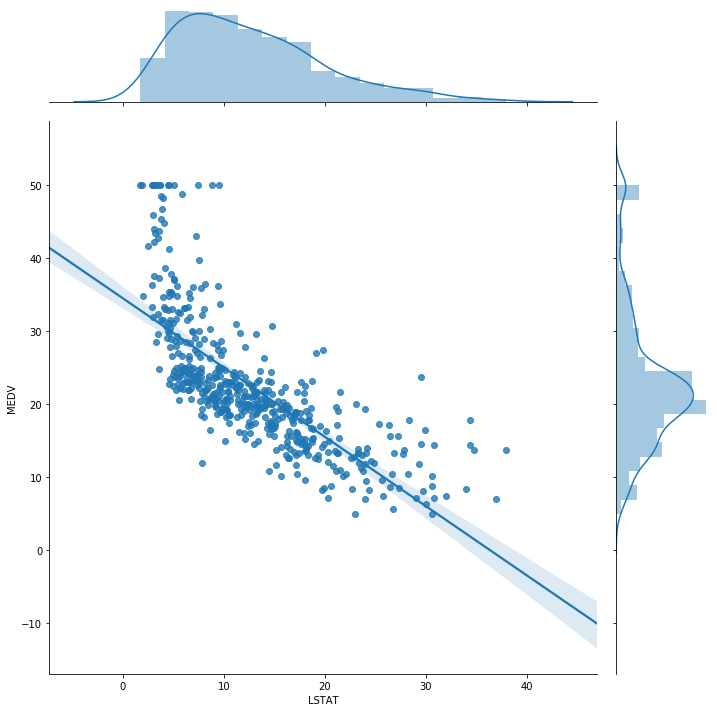

In [25]:
plt.figure(figsize=(16,10))
sns.jointplot(x="LSTAT",y="MEDV",data=df,kind = 'reg',height = 10)
plt.show()

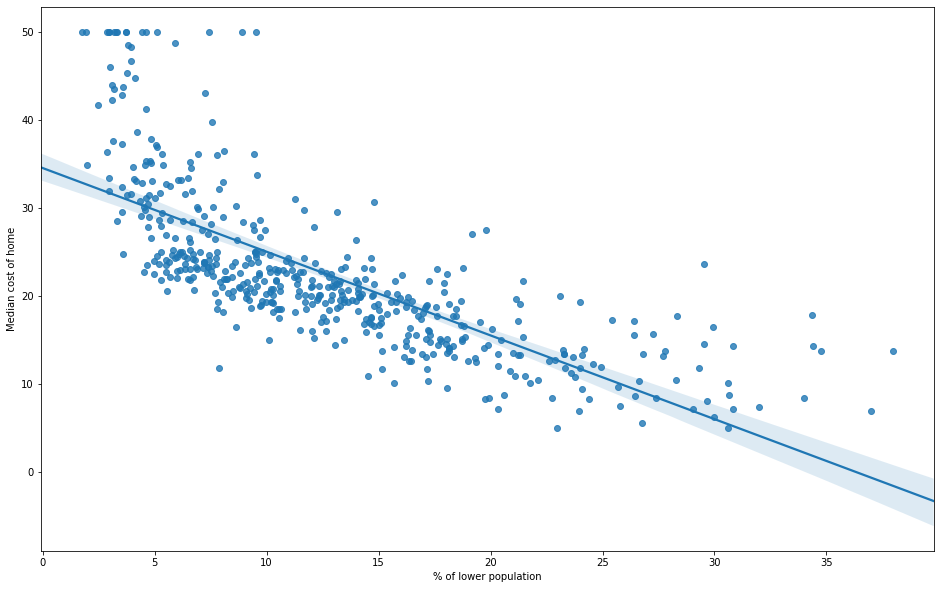

In [26]:
plt.figure(figsize=(16,10))
sns.regplot(A,B)
plt.xlabel("% of lower population")
plt.ylabel("Median cost of home")
plt.show()

Robust Regression RANSAC Algo

In [27]:
X=df['RM'].values.reshape(-1,1)
Y=df['MEDV'].values

In [28]:
from sklearn.linear_model import RANSACRegressor

In [29]:
ransac = RANSACRegressor()

In [30]:
ransac.fit(X,Y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [31]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [32]:
line_X = np.arange(3,10,1)
line_Y = ransac.predict(line_X.reshape(-1,1))

In [33]:
sns.set(style = 'darkgrid', context='notebook')

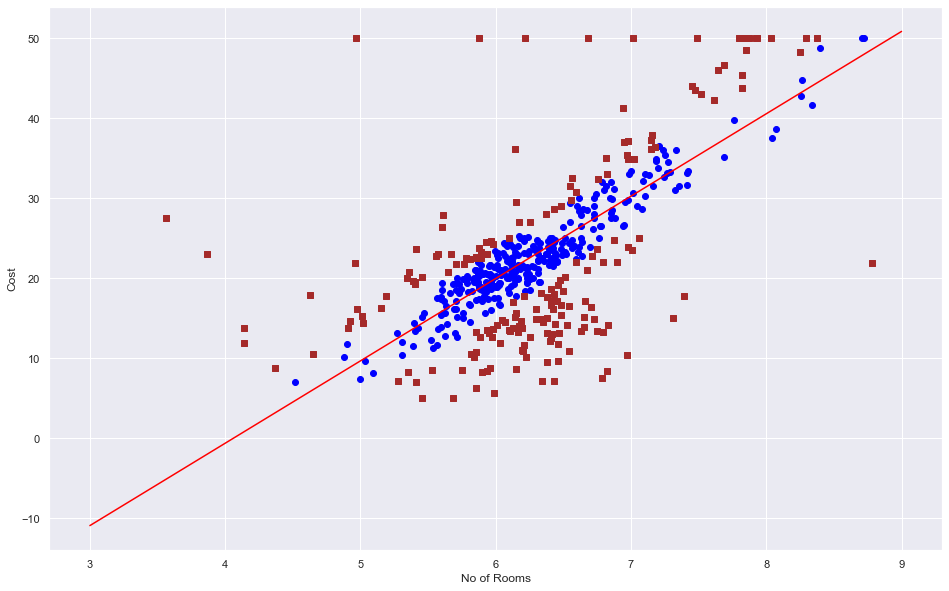

In [34]:
plt.figure(figsize=(16,10))
plt.scatter(X[inlier_mask],Y[inlier_mask],c='blue',marker='o',label='Inliers')
plt.scatter(X[outlier_mask],Y[outlier_mask],c='brown',marker='s',label='Outliers')
plt.plot(line_X,line_Y,color='red')
plt.xlabel("No of Rooms")
plt.ylabel("Cost")
plt.show()

In [35]:
ransac.estimator_.coef_

array([10.29950308])

In [36]:
ransac.estimator_.intercept_

-41.821510186883316

In [37]:
#for lstat
X=df['LSTAT'].values.reshape(-1,1)
Y=df['MEDV'].values

In [38]:
ransac1 = RANSACRegressor()

In [39]:
ransac1.fit(X,Y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [40]:
inlier_mask = ransac1.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [41]:
line_X = np.arange(0,40,1)
line_Y = ransac1.predict(line_X.reshape(-1,1))

In [42]:
sns.set(style = 'darkgrid', context='notebook')

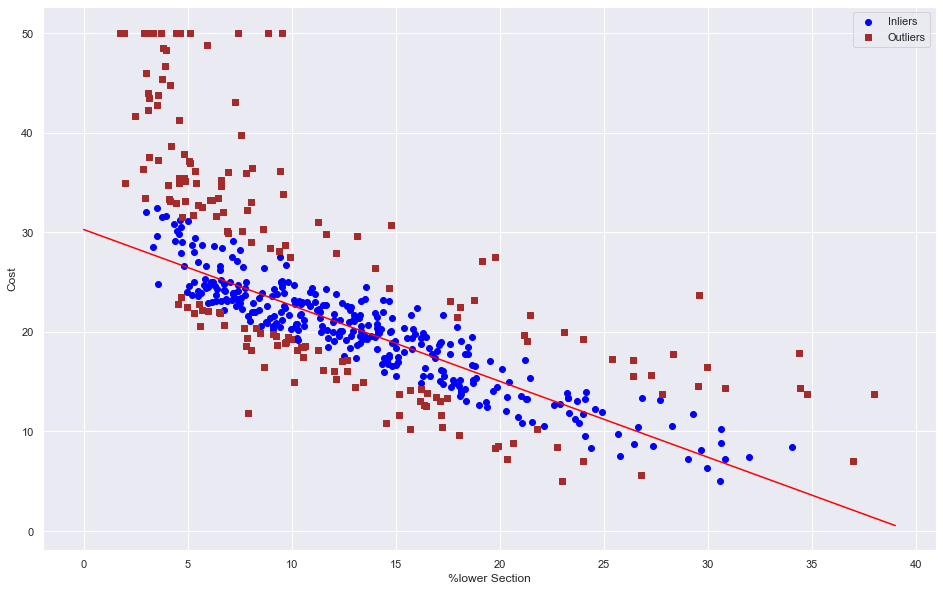

In [43]:
plt.figure(figsize=(16,10))
plt.scatter(X[inlier_mask],Y[inlier_mask],c='blue',marker='o',label='Inliers')
plt.scatter(X[outlier_mask],Y[outlier_mask],c='brown',marker='s',label='Outliers')
plt.plot(line_X,line_Y,color='red')
plt.xlabel("%lower Section")
plt.ylabel("Cost")
plt.legend()
plt.show()

In [44]:
ransac1.estimator_.coef_

array([-0.76225842])

In [45]:
ransac1.estimator_.intercept_

30.27777390021513

Performance Evaluation of Regressive Models

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X=df['LSTAT'].values.reshape(-1,1)
Y=df['MEDV'].values

In [48]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)

In [49]:
lr = LinearRegression()

In [50]:
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
Y_train_pred = lr.predict(X_train)
Y_test_pred = lr.predict(X_test)

Residual Analysis

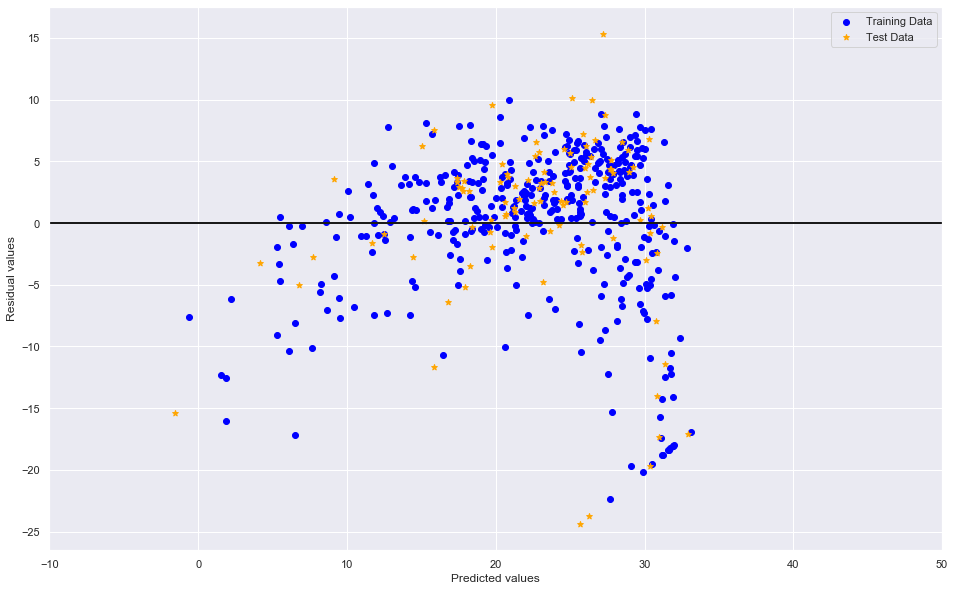

In [52]:
plt.figure(figsize=(16,10))
plt.scatter(Y_train_pred,Y_train_pred-Y_train,c='blue',marker='o',label='Training Data')
plt.scatter(Y_test_pred,Y_test_pred-Y_test,c='orange',marker='*',label='Test Data')
plt.xlabel("Predicted values")
plt.ylabel("Residual values")
plt.legend()
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='k')
plt.xlim([-10,50])
plt.show()

Mean Square Analysis

In [53]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_train,Y_train_pred)



36.523966406959666

In [54]:
mean_squared_error(Y_test,Y_test_pred)

46.33630536002592

R2 method

In [55]:
from sklearn.metrics import r2_score
r2_score(Y_train,Y_train_pred)

0.571031588576562

In [56]:
r2_score(Y_test,Y_test_pred)

0.43095672846187616

Multiple Regression

Correlation Matrix

In [57]:
pd.options.display.float_format='{:,.4f}'.format
corr_matrix=df.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.0000,-0.2005,0.4066,-0.0559,0.4210,-0.2192,0.3527,-0.3797,0.6255,0.5828,0.2899,-0.3851,0.4556,-0.3883
ZN,-0.2005,1.0000,-0.5338,-0.0427,-0.5166,0.3120,-0.5695,0.6644,-0.3119,-0.3146,-0.3917,0.1755,-0.4130,0.3604
INDUS,0.4066,-0.5338,1.0000,0.0629,0.7637,-0.3917,0.6448,-0.7080,0.5951,0.7208,0.3832,-0.3570,0.6038,-0.4837
CHAS,-0.0559,-0.0427,0.0629,1.0000,0.0912,0.0913,0.0865,-0.0992,-0.0074,-0.0356,-0.1215,0.0488,-0.0539,0.1753
NOX,0.4210,-0.5166,0.7637,0.0912,1.0000,-0.3022,0.7315,-0.7692,0.6114,0.6680,0.1889,-0.3801,0.5909,-0.4273
RM,-0.2192,0.3120,-0.3917,0.0913,-0.3022,1.0000,-0.2403,0.2052,-0.2098,-0.2920,-0.3555,0.1281,-0.6138,0.6954
AGE,0.3527,-0.5695,0.6448,0.0865,0.7315,-0.2403,1.0000,-0.7479,0.4560,0.5065,0.2615,-0.2735,0.6023,-0.3770
DIS,-0.3797,0.6644,-0.7080,-0.0992,-0.7692,0.2052,-0.7479,1.0000,-0.4946,-0.5344,-0.2325,0.2915,-0.4970,0.2499
RAD,0.6255,-0.3119,0.5951,-0.0074,0.6114,-0.2098,0.4560,-0.4946,1.0000,0.9102,0.4647,-0.4444,0.4887,-0.3816
TAX,0.5828,-0.3146,0.7208,-0.0356,0.6680,-0.2920,0.5065,-0.5344,0.9102,1.0000,0.4609,-0.4418,0.5440,-0.4685


In [58]:
corr_matrix[np.abs(corr_matrix)<0.6]=0
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6255,0.0000,0.0000,0.0000,0.0000,0.0000
ZN,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6644,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
INDUS,0.0000,0.0000,1.0000,0.0000,0.7637,0.0000,0.6448,-0.7080,0.0000,0.7208,0.0000,0.0000,0.6038,0.0000
CHAS,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
NOX,0.0000,0.0000,0.7637,0.0000,1.0000,0.0000,0.7315,-0.7692,0.6114,0.6680,0.0000,0.0000,0.0000,0.0000
RM,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.6138,0.6954
AGE,0.0000,0.0000,0.6448,0.0000,0.7315,0.0000,1.0000,-0.7479,0.0000,0.0000,0.0000,0.0000,0.6023,0.0000
DIS,0.0000,0.6644,-0.7080,0.0000,-0.7692,0.0000,-0.7479,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
RAD,0.6255,0.0000,0.0000,0.0000,0.6114,0.0000,0.0000,0.0000,1.0000,0.9102,0.0000,0.0000,0.0000,0.0000
TAX,0.0000,0.0000,0.7208,0.0000,0.6680,0.0000,0.0000,0.0000,0.9102,1.0000,0.0000,0.0000,0.0000,0.0000


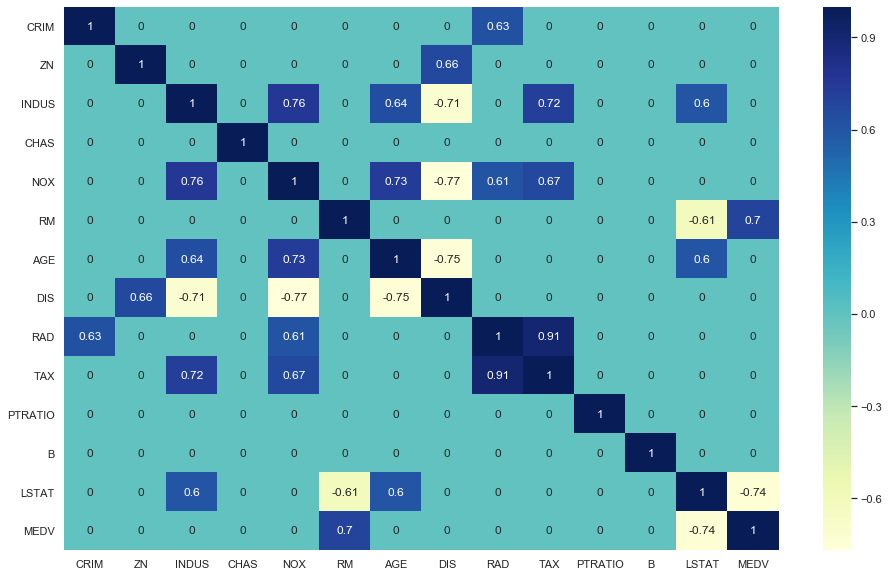

In [59]:
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix,annot = True,cmap='YlGnBu')
plt.show()

Eigen values and vectors

In [60]:
eigenvalues, eigenvectors = np.linalg.eig(df.corr())

In [61]:
pd.Series(eigenvalues).sort_values()

8    0.0603
9    0.1340
12   0.1830
13   0.2128
11   0.2523
10   0.2773
7    0.4031
6    0.5354
5    0.6600
4    0.8509
3    0.8865
2    1.3489
1    1.6495
0    6.5460
dtype: float64

In [62]:
np.abs(pd.Series(eigenvectors[:,8])).sort_values(ascending=False)

9    0.6988
8    0.6350
2    0.2355
13   0.1341
1    0.0963
4    0.0876
12   0.0831
0    0.0591
10   0.0557
7    0.0471
6    0.0382
3    0.0235
11   0.0162
5    0.0072
dtype: float64

Key Features using r2 method

In [63]:
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
y=df['MEDV'].values

In [64]:
linear_reg = smf.ols(formula ='y ~ CRIM + ZN +INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT',data = df)

In [65]:
benchmark = linear_reg.fit()

In [66]:
print(r2_score(y,benchmark.predict(df)))

0.7406426641094093


WITHOUT LSTAT (significant change in r2 indicates importance)

In [67]:
linear_reg = smf.ols(formula ='y ~ CRIM + ZN +INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B ',data = df)
benchmark = linear_reg.fit()
print(r2_score(y,benchmark.predict(df)))

0.6842042799773889


WITHOUT AGE

In [68]:
linear_reg = smf.ols(formula ='y ~ CRIM + ZN +INDUS + CHAS + NOX + RM  + DIS + RAD + TAX + PTRATIO + B + LSTAT',data = df)
benchmark = linear_reg.fit()
print(r2_score(y,benchmark.predict(df)))

0.7406412165505144


POLYNOMIAL REGRESSION

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

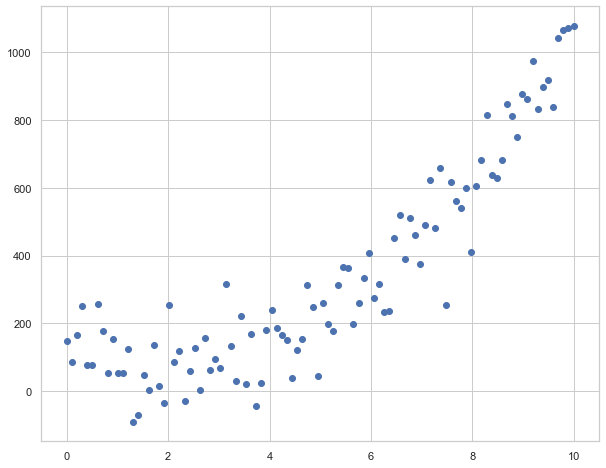

In [70]:
np.random.seed(42)
n_samples=100
X=np.linspace(0,10,100)
rng = np.random.randn(n_samples)*100
y = X**3 +rng +100
plt.figure(figsize=(10,8))
plt.scatter(X,y)

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Using Linear Reg

0.7643394574930141


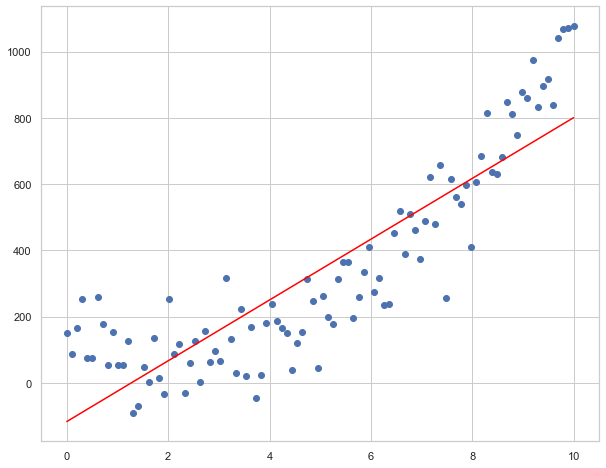

In [72]:
lr = LinearRegression()
lr.fit(X.reshape(-1,1),y)
model_pred = lr.predict(X.reshape(-1,1))
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X,model_pred,c='red')
print(r2_score(y,model_pred))

 Using Polynomial Features

In [73]:
from sklearn.preprocessing import PolynomialFeatures

In [74]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X.reshape(-1,1))

In [75]:
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y.reshape(-1,1))
y_pred = lin_reg2.predict(X_poly)

0.9173858308909386


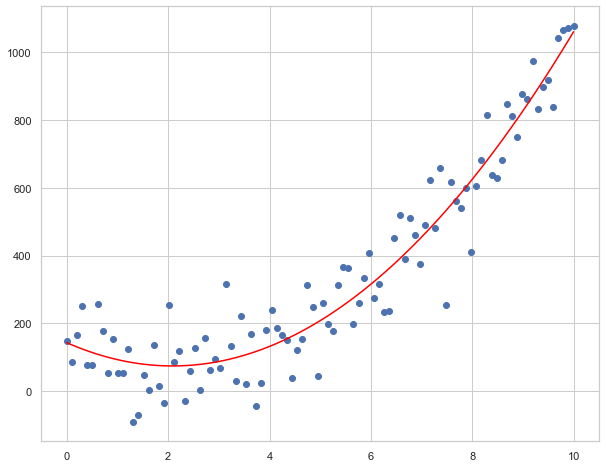

In [76]:
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X,y_pred,c='red')
print(r2_score(y,y_pred))

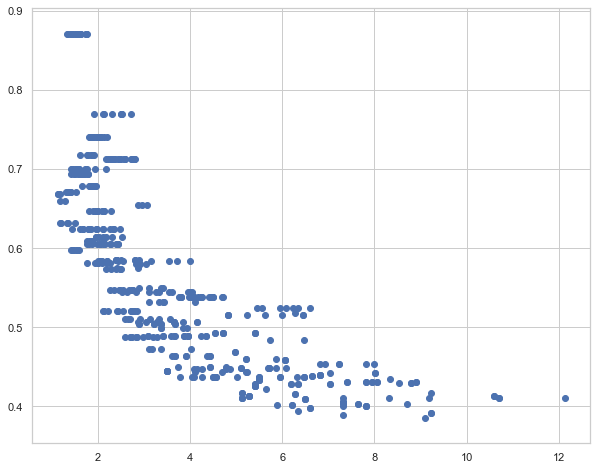

In [77]:
X_boston = df['DIS'].values
y_boston = df['NOX'].values 
plt.figure(figsize=(10,8))
plt.scatter(X_boston,y_boston)

 USING LINEAR REGRESSION

0.5917149670934201


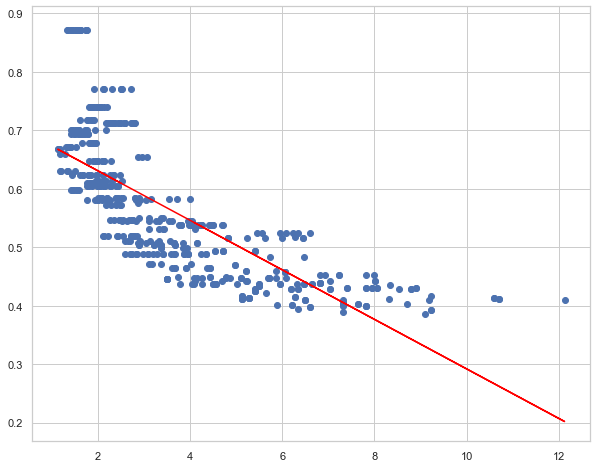

In [78]:
lr=LinearRegression()
lr.fit(X_boston.reshape(-1,1),y_boston)
mod_pred = lr.predict(X_boston.reshape(-1,1))
plt.figure(figsize=(10,8))
plt.scatter(X_boston,y_boston)
plt.plot(X_boston,mod_pred,c='red')
print(r2_score(y_boston,mod_pred))

Quadratic

0.6998562064647851


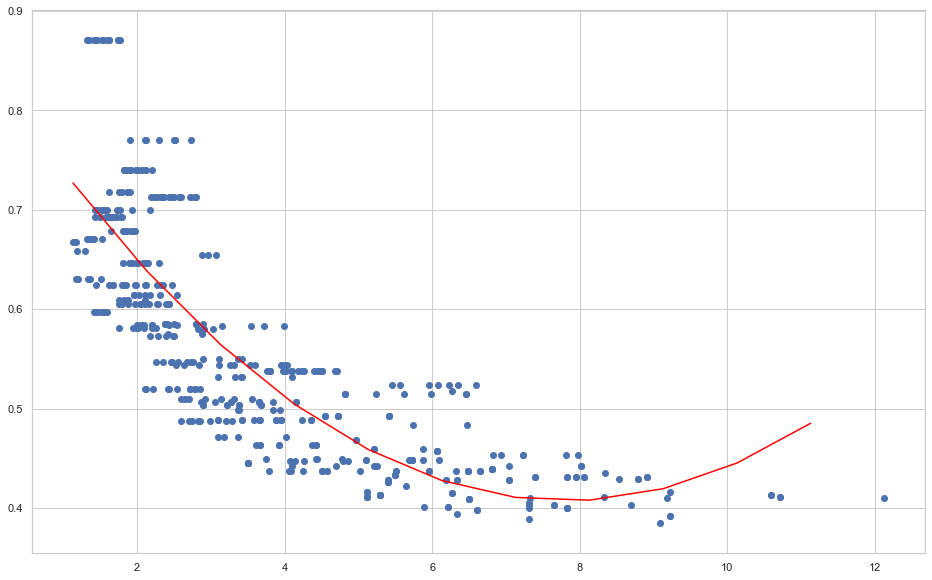

In [81]:
poly_reg= PolynomialFeatures(degree=2)
X_poly_b = poly_reg.fit_transform(X_boston.reshape(-1,1))
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly_b,y_boston)
X_fit = np.arange(X_boston.min(),X_boston.max(),1)[:,np.newaxis]
y_pred = lin_reg2.predict(poly_reg.fit_transform(X_fit.reshape(-1,1)))
plt.figure(figsize=(16,10))
plt.scatter(X_boston,y_boston)
plt.plot(X_fit,y_pred,c='red')
print(r2_score(y_boston,lin_reg2.predict(X_poly_b)))

Degree 3

0.7147737433422647


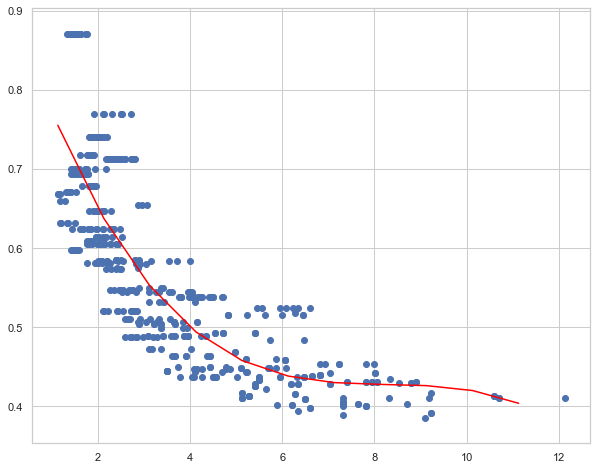

In [83]:
poly_reg= PolynomialFeatures(degree=3)
X_poly_b = poly_reg.fit_transform(X_boston.reshape(-1,1))
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly_b,y_boston)
X_fit = np.arange(X_boston.min(),X_boston.max(),1)[:,np.newaxis]
y_pred = lin_reg2.predict(poly_reg.fit_transform(X_fit.reshape(-1,1)))
plt.figure(figsize=(10,8))
plt.scatter(X_boston,y_boston)
plt.plot(X_fit,y_pred,c='red')
print(r2_score(y_boston,lin_reg2.predict(X_poly_b)))

0.7175486833345454


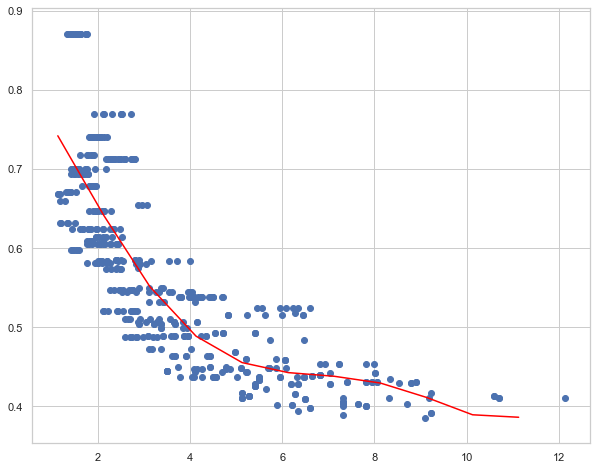

In [89]:
poly_reg= PolynomialFeatures(degree=5)
X_poly_b = poly_reg.fit_transform(X_boston.reshape(-1,1))
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly_b,y_boston)
X_fit = np.arange(X_boston.min(),X_boston.max(),1)[:,np.newaxis]
y_pred = lin_reg2.predict(poly_reg.fit_transform(X_fit.reshape(-1,1)))
plt.figure(figsize=(10,8))
plt.scatter(X_boston,y_boston)
plt.plot(X_fit,y_pred,c='red')
print(r2_score(y_boston,lin_reg2.predict(X_poly_b)))